# Final Project Submission

Group Name: Group 1\
Student Pace: Part time\
Scheduled project review date/time: 4/01/2024\
Instructor name: Samuel Jane\
Blog post URL:

# Table of Contents:
•	Introduction\
•	Business Understanding\
•	Data Understanding\
•	Data Preparation\
•	Modeling\
•	Regression Results\
•	Conclusions & Recommendations\
•	Next Steps

# 1. Introduction
This report is an analysis of house sales in King county using multiple regression models.

# 2. Business Understanding
The analysis aims at developing a predictive model to estimate housing prices in King county, providing real estate developers, agencies, and brokers with valuable insights on what features to consider in their real estate investments to maximize their return on investments.

To help our stakeholders solve this problem, we considered:
1. Which feature(s) has the strongest impact on sales price?
2. How significant are ‘sqft_living’, ‘sqft_lot’, ‘sqft_above’, ‘bedrooms’, 'bathrooms', ‘floors’, 'view' and ‘sqft_basement’ in affecting the prices of houses?
3. Which of the variables significantly affects the prices more that need more investments by the agencies?
4. Which variables are not significant in the way they affect the prices of houses?


# 3. Data Understanding
We are provided with King County house sales dataset
## Importing libraries

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler

## Reading the Dataset

In [45]:
df=pd.read_csv(r"C:\Users\Admin\Downloads\projo\kc_house_data.csv")

## Data Inspection

In [46]:
# Display the first 5 records
df.head(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [47]:
# Illustrating the datatype definitions for columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  int64  
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [48]:
# Describe the statistics for the dataset
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [49]:
# The number of columns and rows in our dataset
df.shape

(21597, 21)

## 4. Data Cleaning & Preparation

In [50]:
# Checking for null values in the DataFrame
null_values = df.isnull().sum()

print("Null values in each column:")
print(null_values)

Null values in each column:
id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64


# Handling categorical variables

In [51]:
# Replacing the Null values in the 'view' column with 'NONE'
df['view'].fillna('NONE', inplace=True)
df['view'].unique()

array(['NONE', 'GOOD', 'EXCELLENT', 'AVERAGE', 'FAIR'], dtype=object)

In [52]:
# Mapping of categorical values in view to numerics
view_mapping = {'NONE': 0, 'FAIR': 1, 'AVERAGE': 2, 'GOOD': 3, 'EXCELLENT': 4}

df['view'] = df['view'].map(view_mapping)
df['view'].unique()

array([0, 3, 4, 2, 1], dtype=int64)

In [53]:
# Checking for unique values on the sqft_basement column
df['sqft_basement'].value_counts()

sqft_basement
0       12826
?         454
600       217
500       209
700       208
        ...  
1920        1
3480        1
2730        1
2720        1
248         1
Name: count, Length: 304, dtype: int64

In [54]:
# Cleaning the 'sqft_basement' column by replacing ? with zero 
df['sqft_basement'] = df['sqft_basement'].replace({ '?' : '0'})
df['sqft_basement'] = pd.to_numeric(df['sqft_basement'], errors='coerce')
df['sqft_basement'].value_counts()

sqft_basement
0       13280
600       217
500       209
700       208
800       201
        ...  
1920        1
3480        1
2730        1
2720        1
248         1
Name: count, Length: 303, dtype: int64

In [55]:
# Checking for unique values on the grade column
df['grade'].value_counts()

grade
7 Average        8974
8 Good           6065
9 Better         2615
6 Low Average    2038
10 Very Good     1134
11 Excellent      399
5 Fair            242
12 Luxury          89
4 Low              27
13 Mansion         13
3 Poor              1
Name: count, dtype: int64

In [56]:
# Cleaning and Splitting the grade column into grade and grade description
df['grade'] = df['grade'].str.extract('(\d+)')
df['grade_description'] = df['grade'].str.extract('([^\d]+)')
# Converting 'grade' column to numeric (integer)
df['grade'] = pd.to_numeric(df['grade'], errors='coerce')

In [57]:
# Handling the categorical variables in the condition column

#Defining a mapping dictionary
condition_mapping = {'Poor': 1, 'Fair': 2, 'Average': 3, 'Good': 4, 'Very Good': 5}
# Applying the mapping to the 'condition' column
df['condition'] = df['condition'].map(condition_mapping)


In [58]:
# Dropping the Columns that we consider less relevant to our analysis 
df = df.drop(columns=['date', 'waterfront', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15', 'grade_description'])

# Display the updated DataFrame
df.head(5)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement
0,7129300520,221900,3,1.00,1180,5650,1.0,0,3,7,1180,0
1,6414100192,538000,3,2.25,2570,7242,2.0,0,3,7,2170,400
2,5631500400,180000,2,1.00,770,10000,1.0,0,3,6,770,0
3,2487200875,604000,4,3.00,1960,5000,1.0,0,5,7,1050,910
4,1954400510,510000,3,2.00,1680,8080,1.0,0,3,8,1680,0


In [59]:
#Checking for the datatypes
print(df.dtypes)

id                 int64
price              int64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
dtype: object


In [60]:
#Scaling variables to use one scale

df_num = df[['sqft_living','bedrooms','sqft_basement','sqft_lot','price','bathrooms','view','grade','condition']]

# create object
scaler = MinMaxScaler()

#Fit -> transform
scaler.fit(df_num)
scaled = scaler.transform(df_num)

#Convert to a data frame because it is returned in an array form
df_num = pd.DataFrame(data = scaled, columns=df_num.columns)
df_num

,sqft_living,bedrooms,sqft_basement,sqft_lot,price,bathrooms,view,grade,condition
0,0.061503,0.06250,0.000000,0.003108,0.018880,0.066667,0.0,0.4,0.5
1,0.167046,0.06250,0.082988,0.004072,0.060352,0.233333,0.0,0.4,0.5
2,0.030372,0.03125,0.000000,0.005743,0.013382,0.066667,0.0,0.3,0.5
3,0.120729,0.09375,0.188797,0.002714,0.069011,0.333333,0.0,0.4,1.0
4,0.099468,0.06250,0.000000,0.004579,0.056678,0.200000,0.0,0.5,0.5
...,...,...,...,...,...,...,...,...,...
21592,0.088079,0.06250,0.000000,0.000370,0.036998,0.266667,0.0,0.5,0.5
21593,0.147304,0.09375,0.000000,0.003206,0.042246,0.266667,0.0,0.5,0.5
21594,0.049355,0.03125,0.000000,0.000503,0.042522,0.033333,0.0,0.4,0.5
21595,0.093394,0.06250,0.000000,0.001132,0.042246,0.266667,0.0,0.5,0.5


## Checking for Outliers

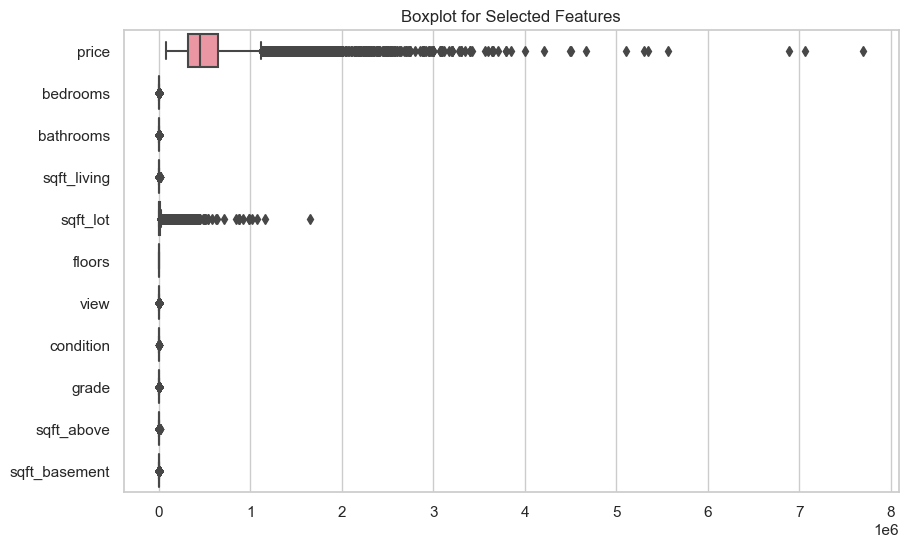

In [61]:
# Selecting specific columns for boxplot
columns_of_interest = ['price','bedrooms','bathrooms','sqft_living','sqft_lot','floors','view','condition','grade', 'sqft_above','sqft_basement']
subset_X = df[columns_of_interest]

# Creating a boxplot using seaborn
sns.set(style="whitegrid")  
plt.figure(figsize=(10, 6))  

# Using the boxplot function
sns.boxplot(data=subset_X, orient="h")

plt.title('Boxplot for Selected Features')
plt.show()


## Removal of Outliers

In [62]:
# Calculating the IQR (Interquartile Range) for price column
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

# Defining a threshold for outliers (e.g., 1.5 times the IQR)
outlier_threshold = 1.5 * IQR

# Identifying outliers
outliers = ((df['price'] < Q1 - outlier_threshold) | (df['price'] > Q3 + outlier_threshold))

# Calculating the percentage of outliers
percentage_outliers = (outliers.sum() / len(df)) * 100

print(f"Percentage of outliers: {percentage_outliers}%")

Percentage of outliers: 5.361855813307404%


In [63]:
# Calculating the IQR (Interquartile Range)
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

# Defining the range for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identifying outliers
outliers = df[(df['price'] < lower_bound) | (df['price'] > upper_bound)]

# Displaying the range of outliers
print("Range of outliers:")
print(f"Lower Bound: {lower_bound}")
print(f"Upper Bound: {upper_bound}")


Range of outliers:
Lower Bound: -162500.0
Upper Bound: 1129500.0


In [64]:
#Handling outliers
# Initialize the RobustScaler
scaler = RobustScaler()

# Fit and transform the data using the scaler
df['price'] = scaler.fit_transform(df[['price']])

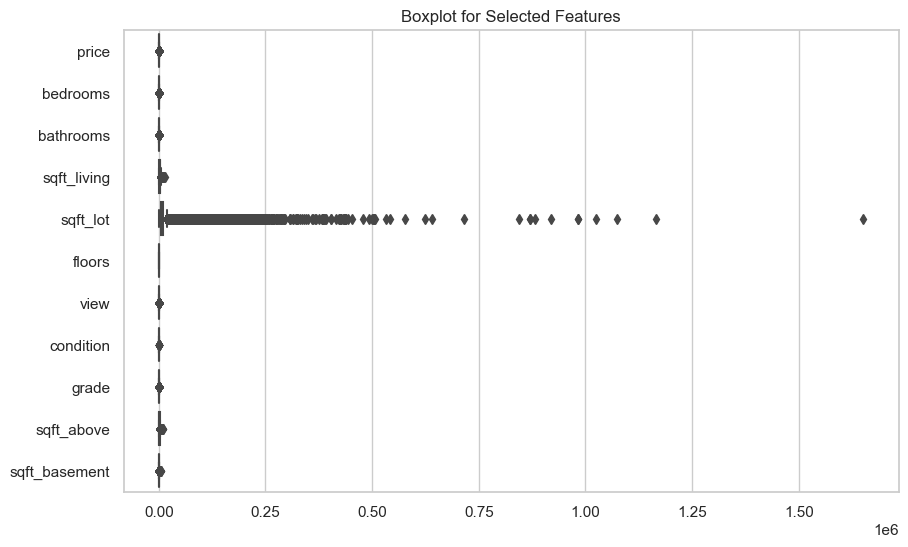

In [66]:
# Rechecking outliers
# Selecting specific columns for boxplot
columns_of_interest = ['price','bedrooms','bathrooms','sqft_living','sqft_lot','floors','view','condition','grade', 'sqft_above','sqft_basement']
subset_X = df_no_outliers[columns_of_interest]

# Creating a boxplot using seaborn
sns.set(style="whitegrid")  
plt.figure(figsize=(10, 6))  

# Using the boxplot function
sns.boxplot(data=subset_X, orient="h")

plt.title('Boxplot for Selected Features')
plt.show()


In [68]:
# Dropping the sqft_lot variable because 
df = df.drop(columns=['sqft_lot'])
df.head(5)

,id,price,bedrooms,bathrooms,sqft_living,floors,view,condition,grade,sqft_above,sqft_basement
0,7129300520,-0.706192,3,1.00,1180,1.0,0,3,7,1180,0
1,6414100192,0.272446,3,2.25,2570,2.0,0,3,7,2170,400
2,5631500400,-0.835913,2,1.00,770,1.0,0,3,6,770,0
3,2487200875,0.476780,4,3.00,1960,1.0,0,5,7,1050,910
4,1954400510,0.185759,3,2.00,1680,1.0,0,3,8,1680,0


# 5. Modeling

In [69]:
# Finding the correlation between the selected variables
df_num = df[['price','bedrooms','bathrooms','sqft_living','floors','view','condition','grade', 'sqft_above','sqft_basement']]
print(df_num.corrwith(df_num['price']))

price            1.000000
bedrooms         0.308787
bathrooms        0.525906
sqft_living      0.701917
floors           0.256804
view             0.393497
condition        0.036056
grade            0.667951
sqft_above       0.605368
sqft_basement    0.321108
dtype: float64


In [70]:
# Correlation matrix based on our sliced data
#Pearson Correlation between columns
df_plot_Corr = df.corr(method='pearson', numeric_only=True)
df_plot_Corr

,id,price,bedrooms,bathrooms,sqft_living,floors,view,condition,grade,sqft_above,sqft_basement
id,1.000000,-0.016772,0.001150,0.005162,-0.012241,0.018608,0.011772,-0.023803,0.008188,-0.010799,-0.004359
price,-0.016772,1.000000,0.308787,0.525906,0.701917,0.256804,0.393497,0.036056,0.667951,0.605368,0.321108
bedrooms,0.001150,0.308787,1.000000,0.514508,0.578212,0.177944,0.078354,0.026496,0.356563,0.479386,0.297229
bathrooms,0.005162,0.525906,0.514508,1.000000,0.755758,0.502582,0.186016,-0.126479,0.665838,0.686668,0.278485
sqft_living,-0.012241,0.701917,0.578212,0.755758,1.000000,0.353953,0.281715,-0.059445,0.762779,0.876448,0.428660
floors,0.018608,0.256804,0.177944,0.502582,0.353953,1.000000,0.028414,-0.264075,0.458794,0.523989,-0.241866
view,0.011772,0.393497,0.078354,0.186016,0.281715,0.028414,1.000000,0.045622,0.249082,0.166017,0.270629
condition,-0.023803,0.036056,0.026496,-0.126479,-0.059445,-0.264075,0.045622,1.000000,-0.146896,-0.158904,0.168482
grade,0.008188,0.667951,0.356563,0.665838,0.762779,0.458794,0.249082,-0.146896,1.000000,0.756073,0.165843
sqft_above,-0.010799,0.605368,0.479386,0.686668,0.876448,0.523989,0.166017,-0.158904,0.756073,1.000000,-0.051175


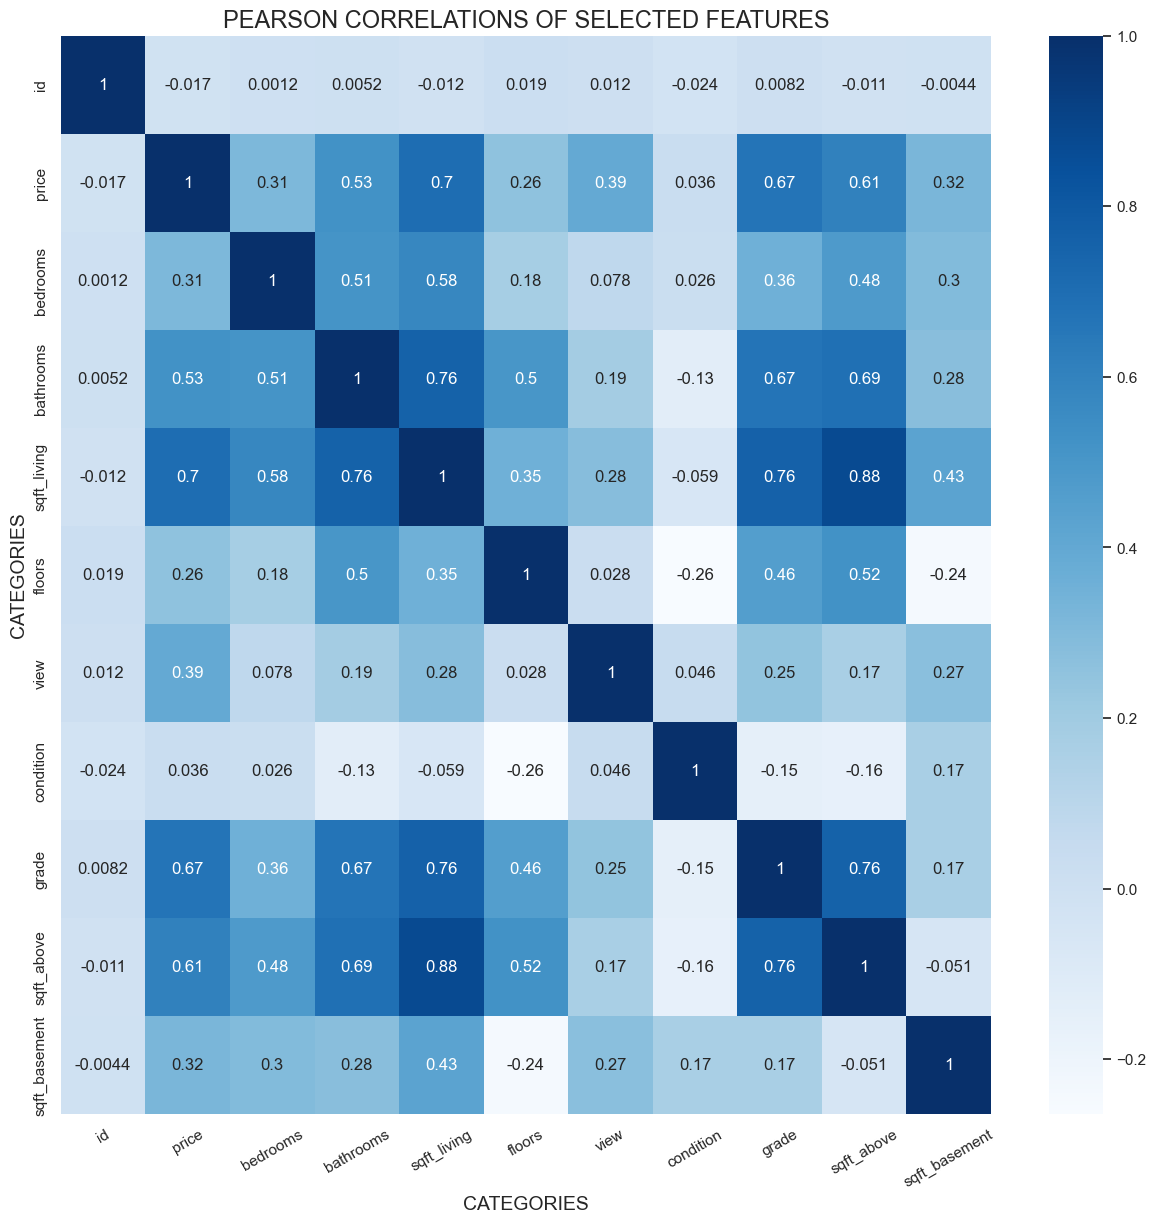

In [71]:
#Heatmap on the pearson correlations of the sliced dataset
fig,ax=plt.subplots(figsize=(15,14))
sns.set_theme(style='white')
sns.heatmap(data=df_plot_Corr,annot=True,cmap='Blues')
plt.xticks(rotation=30)
plt.xlabel('CATEGORIES',fontsize=14)
plt.ylabel('CATEGORIES',fontsize=14)
plt.title('PEARSON CORRELATIONS OF SELECTED FEATURES',fontsize=17);

## Regression Modeling

In [72]:
#Starting with a simple regression from the numeric data with highest correlation with the price
y = df[['price']]

X = df[['sqft_living']]

# Taking 'X' as our feature matrix and 'y' as our target variable
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Adding a constant term for the intercept
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

# Fitting the model on the training data
model = sm.OLS(y_train, X_train).fit()

# Making predictions on the test data
y_pred = model.predict(X_test)

# Evaluating the model on the test data (for example, using Mean Squared Error)
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error on Test Data: {mae}')

# Display the summary of the regression model
print(model.summary())

Mean Absolute Error on Test Data: 0.5293588998747824
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.492
Model:                            OLS   Adj. R-squared:                  0.492
Method:                 Least Squares   F-statistic:                 1.676e+04
Date:                Fri, 29 Dec 2023   Prob (F-statistic):               0.00
Time:                        16:31:48   Log-Likelihood:                -20954.
No. Observations:               17277   AIC:                         4.191e+04
Df Residuals:                   17275   BIC:                         4.193e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------

In [73]:
# #Interpreting the coefficients to understand how sqft_living contributes to the predicted house price.
# Getting the coefficients and intercept
coefficients = model.params
intercept = model.params[0]
print('Coefficients:', coefficients)
print('Intercept:', intercept)


Coefficients: const         -1.536989
sqft_living    0.000874
dtype: float64
Intercept: -1.5369886858144577


### Interpretation of the simple linear regression model results

In [74]:
# With one unit increase in sqft_living, there is a 0.000874 unit increase in the prices of the houses other factors held constant.

## Multiple Linear Regression model: Adding more variables

In [75]:
#Adding more variables to the regression model
y = df['price']
X = df[['bedrooms','bathrooms','sqft_living','floors','view','condition','grade', 'sqft_above','sqft_basement']]

# Taking 'X' as our feature matrix and 'y' as our target variable
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Adding a constant term for the intercept
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

# Fitting the model on the training data
model = sm.OLS(y_train, X_train).fit()

# Making predictions on the test data
y_pred = model.predict(X_test)

# Evaluating the model on the test data (for example, using Mean Squared Error)
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error on Test Data: {mae}')

# Display the summary of the regression model
print(model.summary())

Mean Absolute Error on Test Data: 0.47135567865530736
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.591
Model:                            OLS   Adj. R-squared:                  0.591
Method:                 Least Squares   F-statistic:                     2775.
Date:                Fri, 29 Dec 2023   Prob (F-statistic):               0.00
Time:                        16:31:48   Log-Likelihood:                -19085.
No. Observations:               17277   AIC:                         3.819e+04
Df Residuals:                   17267   BIC:                         3.827e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------

# Model Evaluation

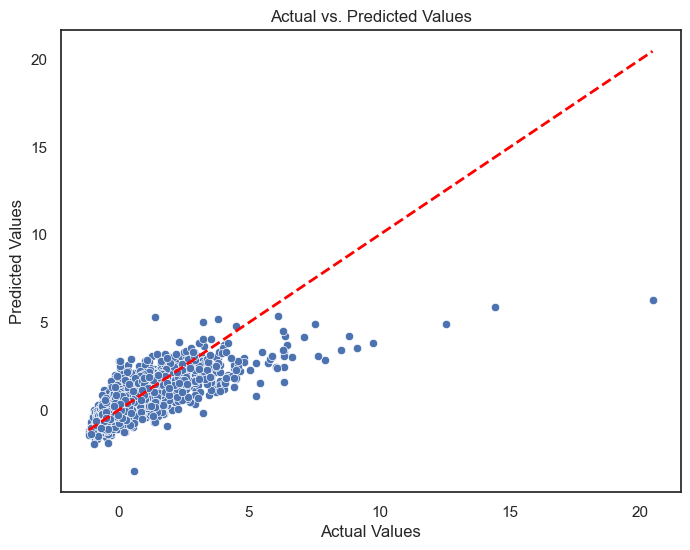

In [76]:
# Testing the performance of our regression model by plotting actual vs predicted values
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)
plt.title('Actual vs. Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

# Interpretation of results
The points cluster around the diagonal line indicating good predictive performance.\
On the other hand, there is need to investigate further and potentially improve our model.

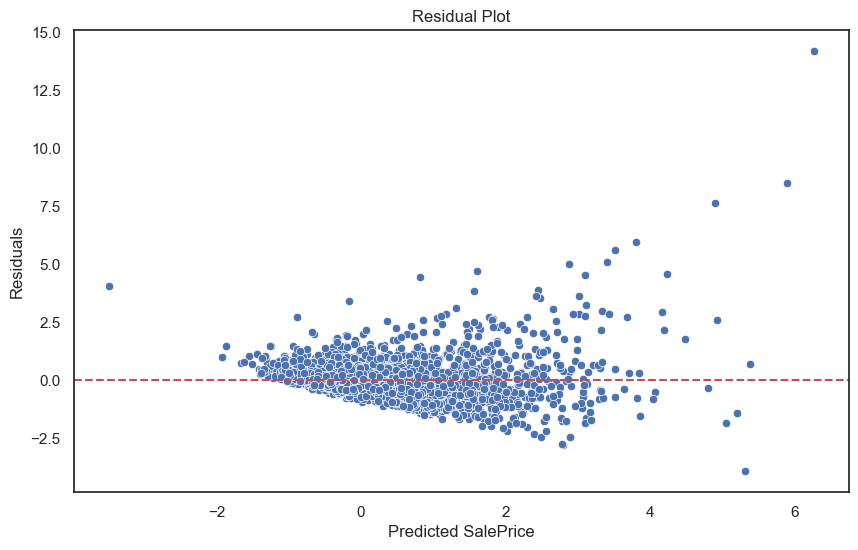

In [77]:
# Calculating residuals
residuals = y_test - y_pred

# Plot residuals
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residual Plot')
plt.xlabel('Predicted SalePrice')
plt.ylabel('Residuals')
plt.show()

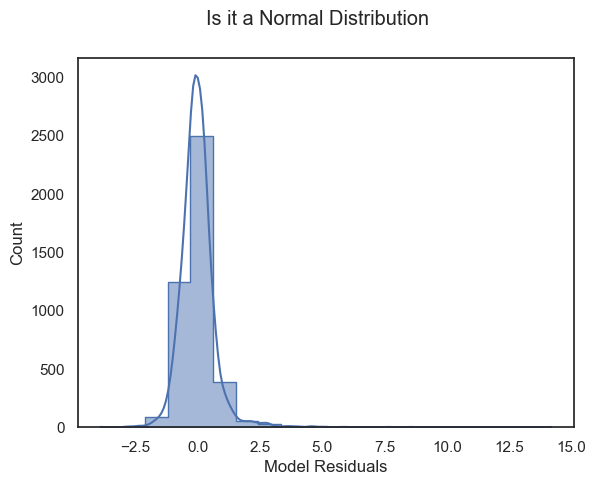

In [78]:
# Testing Model Residuals whether they assume a normal distribution curve
fig, ax = plt.subplots()
sns.histplot(residuals, bins=20, element="step", kde=True, ax=ax)
ax.set_xlabel("Model Residuals")
fig.suptitle("Is it a Normal Distribution");


## Testing for Multicollinearity

In [79]:
from sklearn.preprocessing import MinMaxScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
X = df[['bedrooms','bathrooms','sqft_living','floors','view','condition','grade', 'sqft_above','sqft_basement']]
def preprocessing(X):    
    scaler = MinMaxScaler()
    X_scaled = scaler.fit_transform(X)
    variables = X_scaled
    vif = pd.DataFrame()
    vif["VIF"] = [variance_inflation_factor(variables, i) for i in range(variables.shape[1])]
    vif["Features"] = X.columns
    print(vif)
preprocessing(X)

          VIF       Features
0   11.106314       bedrooms
1   15.900010      bathrooms
2  649.740578    sqft_living
3    3.356895         floors
4    1.248990           view
5    9.838247      condition
6   25.968486          grade
7  465.506441     sqft_above
8   46.987059  sqft_basement


# Interpreting the results of the multicollinearity test

Looking at your results:

1. sqft_living and sqft_above have very high VIF values (649.74 and 465.51, respectively), suggesting a high degree of multicollinearity.
2. grade and sqft_basement also has a high VIF (25.97, 46.98) respectively, indicating potential multicollinearity.
3. Other variables such as bathrooms, bedrooms, and sqft_basement also have elevated VIF values.

To address multicollinearity we chose to remove sqft_above since it is highly correlated with the sqft_living

In [80]:
df = df.drop(columns=['sqft_above'])
df.head(5)

,id,price,bedrooms,bathrooms,sqft_living,floors,view,condition,grade,sqft_basement
0,7129300520,-0.706192,3,1.00,1180,1.0,0,3,7,0
1,6414100192,0.272446,3,2.25,2570,2.0,0,3,7,400
2,5631500400,-0.835913,2,1.00,770,1.0,0,3,6,0
3,2487200875,0.476780,4,3.00,1960,1.0,0,5,7,910
4,1954400510,0.185759,3,2.00,1680,1.0,0,3,8,0


In [81]:
from sklearn.preprocessing import MinMaxScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
X = df[['bedrooms','bathrooms','sqft_living','floors','view','condition','grade','sqft_basement']]
def preprocessing(X):    
    scaler = MinMaxScaler()
    X_scaled = scaler.fit_transform(X)
    variables = X_scaled
    vif = pd.DataFrame()
    vif["VIF"] = [variance_inflation_factor(variables, i) for i in range(variables.shape[1])]
    vif["Features"] = X.columns
    print(vif)
preprocessing(X)

         VIF       Features
0  11.105818       bedrooms
1  15.873824      bathrooms
2  17.293923    sqft_living
3   3.326857         floors
4   1.247434           view
5   9.820205      condition
6  25.870290          grade
7   2.422040  sqft_basement


# Running our linear regression model with the remaining variables

In [82]:
#Adding remaining features to the regression model
y = df['price']
X = df[['bedrooms', 'bathrooms','sqft_living','floors', 'view', 'condition', 'grade', 'sqft_basement']]

# Taking 'X' as our feature matrix and 'y' as our target variable
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Adding a constant term for the intercept
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

# Fitting the model on the training data
model = sm.OLS(y_train, X_train).fit()

# Making predictions on the test data
y_pred = model.predict(X_test)

# Evaluating the model on the test data 
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error on Test Data: {mse}')

# Displaying the summary of the regression model
print(model.summary())

Mean Squared Error on Test Data: 0.5302992059110792
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.591
Model:                            OLS   Adj. R-squared:                  0.591
Method:                 Least Squares   F-statistic:                     3122.
Date:                Fri, 29 Dec 2023   Prob (F-statistic):               0.00
Time:                        16:31:50   Log-Likelihood:                -19086.
No. Observations:               17277   AIC:                         3.819e+04
Df Residuals:                   17268   BIC:                         3.826e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------

# Model Evaluation

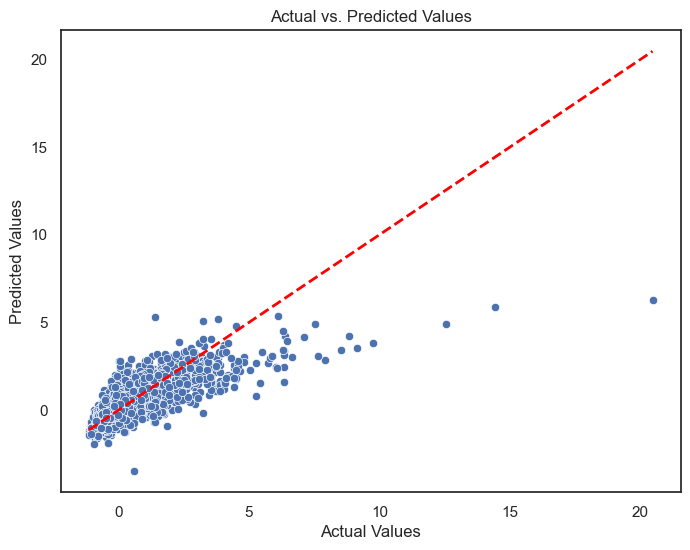

In [83]:
# Testing the performance of our regression model by plotting actual vs predicted values
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)
plt.title('Actual vs. Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

# Interpretation of results
The points cluster around the diagonal line indicating good predictive performance.\
On the other hand, there is need to investigate further and potentially improve our model.

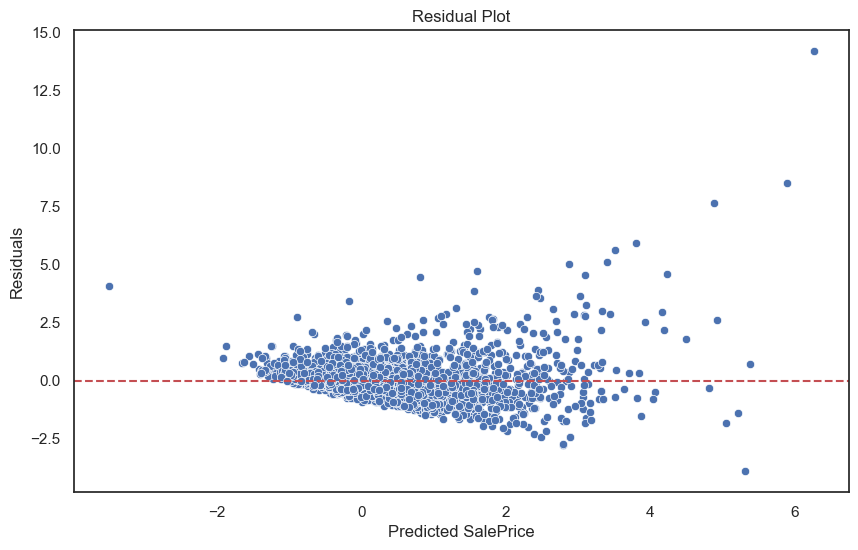

In [84]:
# Calculating residuals
residuals = y_test - y_pred

# Plot residuals
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residual Plot')
plt.xlabel('Predicted SalePrice')
plt.ylabel('Residuals')
plt.show()

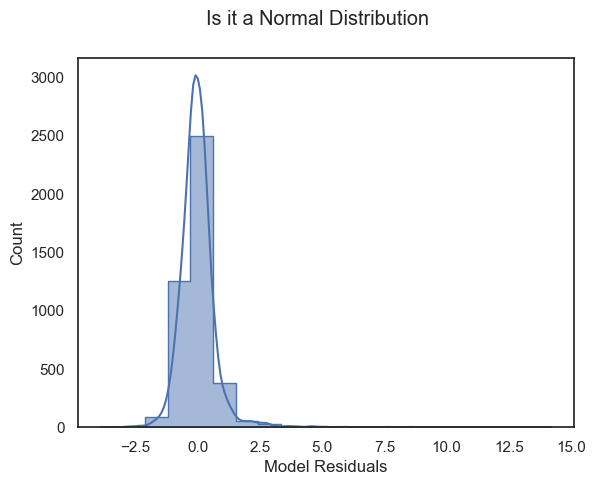

In [85]:
# Testing Model Residuals whether they assume a normal distribution curve
fig, ax = plt.subplots()
sns.histplot(residuals, bins=20, element="step", kde=True, ax=ax)
ax.set_xlabel("Model Residuals")
fig.suptitle("Is it a Normal Distribution");

In [86]:
# Interpreting the coefficients:

# Getting the coefficients and intercept
coefficients = model.params
intercept = model.params[0]  
print('Coefficients:', coefficients)
print('Intercept:', intercept)


Coefficients: const           -3.621211
bedrooms        -0.120272
bathrooms       -0.037854
sqft_living      0.000570
floors           0.014909
view             0.263445
condition        0.177668
grade            0.323798
sqft_basement    0.000121
dtype: float64
Intercept: -3.621211181184394


The above coefficients show the extent in which the response variable (price) changes for a one unit increase in the predictor variables (features). These changes are either to the positive or to the negative.

These interpretations assume a linear relationship, and the actual impact can be influenced by the scale of the variables and the presence of interactions.

## Normalizing Coefficients
To better interpret the results of our model, we normalized our coefficients.

In [87]:
coefficients = model.params
normalized_coefficients = (coefficients - min(coefficients)) / ((max(coefficients) - min(coefficients)))
normalized_coefficients

const            0.000000
bedrooms         0.887435
bathrooms        0.908327
sqft_living      0.918066
floors           0.921701
view             0.984701
condition        0.962958
grade            1.000000
sqft_basement    0.917953
dtype: float64

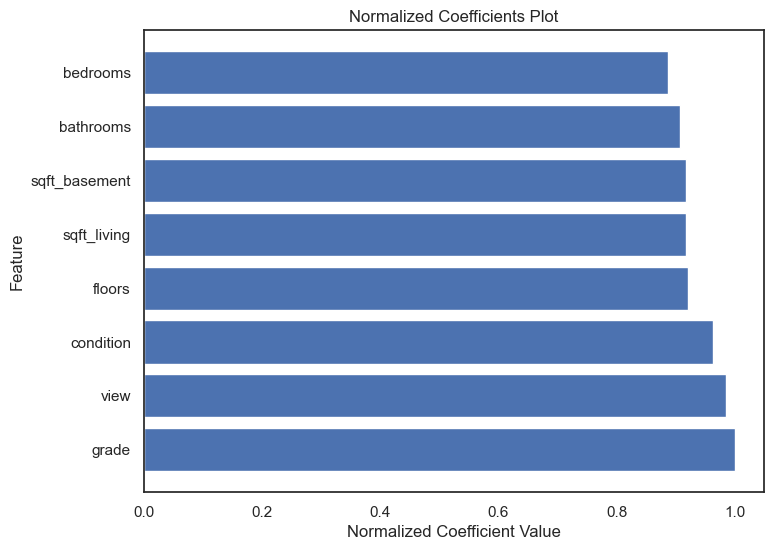

In [88]:
# Plotting the normalized coefficients
features = ['const', 'bedrooms', 'bathrooms', 'sqft_living', 'floors', 'view', 'condition', 'grade', 'sqft_basement']

# Filtering out the constant term
non_constant_features = [feature for feature in features if feature != 'const']

sorted_features, sorted_coefficients = zip(*sorted(zip(non_constant_features, normalized_coefficients[1:]), key=lambda x: abs(x[1]), reverse=True))

plt.figure(figsize=(8, 6))
plt.barh(sorted_features, sorted_coefficients)  
plt.title('Normalized Coefficients Plot')
plt.xlabel('Normalized Coefficient Value')
plt.ylabel('Feature')
plt.show()


# 6. Regression Results
• In this analysis after cleaning the data, a correlation analysis was done between price and the variables sqft_living, sqft_lot, sqft_above, bedrooms, floors, sqft_basement, and bathrooms.\
• It was determined that sqft_living, and grade showed a strong positive correlation with correlation coefficients of 0.701917 and 0.667951 respectively.\
• sqft_above and bathrooms with correlation coefficients of 0.605368 and 0.525906 respectively showed moderate positive correlation.\
• The variables bedrooms, floors, view, condition and sqft_basement were found to exhibit a weak positive correlation with price.\
The initial simple linear regression analysis was done to determine the effect of sqft_living on price of the houses. At 95% confidence level, the conclusion derived from the analysis is that sqft_living has a statistically significant effect on the prices of the houses (p=0.00). 49.2% of the prices is explained by the sqft_living judging by the R-squared.\
• The final model from this simple linear regression analysis was:\
        Price= -1.5370+0.0009(sqft_living) + e.\
• After a series of refining the model and changing the categorical data from strings to numeric, a multiple linear regression was done with the dependent variables as price, and the independent variables as bedrooms, bathrooms, sqft_living, floors, view, condition, grade, and sqft_basement.

## The Regression Model;
Price = -3.6202 - 0.12027(bedrooms) - 0.03785(bathrooms) + 0.00057(sqft_living) + 0.014909(floors) + 0.263445 (view) + 0.17767(condition) + 0.323798(grade)+ 0.00012(sqft_basement)+ e.\

Due to the different scales among the variables the regression coefficients were normalized to give interpretable Multiple linear regression coefficients as; 

## Normalized Model
Price = 0.000000 + 0.887435(bedrooms) + 0.908327(bathrooms) + 0.918066(sqft_living) + 0.921701(floors) + 0.984701(view) + 0.962958(condition) + 1.000000(grade) + 0.917953(sqft_basement)+ e.

## Interpretation
The MLR result was found to be exhibiting a statistical significance at 95% confidence level (p=0.00) with respect to the effect of 'sqft_living','bedrooms','floors','sqft_basement','condition','grade', 'view' and 'bathrooms' on price. The independent variables explain 59.3% of the price of the houses (R-squared= 0.591).
The factors ranked from the one with the highest impact on prices to the least are; 'grade', 'view','condition', 'floors',  'sqft_living', 'sqft_basement', 'bathrooms', and the least impactful variable on the price is 'bedrooms'.

# 7. Conclusion and Recommendations
1. Focus on Key Property Features: Our stakeholders should focus on key property features such as grade, view and condition that significantly influence housing prices. 
2. Upgrade Property Grades: Real estate developers and agencies should focus on improving the overall grade of properties, as it has a strong positive correlation with housing prices.
3.  Enhance Views: Properties with better views tend to have higher prices. Real estate developers and agencies should consider and enhance the views of their properties.

# 8. Next Steps

1. Improve on the model by researching/adding other variables which would improve the model to explain the remaining 40.7%. 
2. Explore additional features or transformations of existing features that could enhance the model's predictive power.
3. Revisit the data to identify and address outliers or influential points that may be impacting the model's performance.
4. Validate the model on new data to assess how well the model performs on unseen data